In [1]:
from zigzag.classes.stages import *
from stream.classes.stages import *
from stream.visualization.schedule import (
    plot_timeline_brokenaxes,
)
from stream.visualization.memory_usage import plot_memory_usage
from stream.inputs.examples.hardware.cores.TPU_like import get_core as get_tpu_core
from stream.inputs.examples.hardware.cores.offchip import get_offchip_core
from stream.inputs.examples.hardware.nocs.mesh_2d import get_2d_mesh
from zigzag.classes.hardware.architecture.accelerator import Accelerator
from zigzag.classes.stages import Stage
from stream.classes.workload.computation_node import ComputationNode
from stream.classes.workload.simd_node import SimdNode
from stream.classes.workload.elementwise_node import ElementwiseNode
from stream.classes.workload.flatten_node import FlattenNode
from stream.classes.workload.dummy_node import DummyNode
from stream.classes.stages import UserDefinedModelParserStage
import pickle
from cyclic_scheduling_fitness_evaluator.stream_compatibility_layer import CyclicFitnessEvaluatorBuilder, MinimumLatency, MinimumMemory

In [3]:
from stream.visualization.schedule import visualize_timeline_plotly

# FSRCNN

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-11


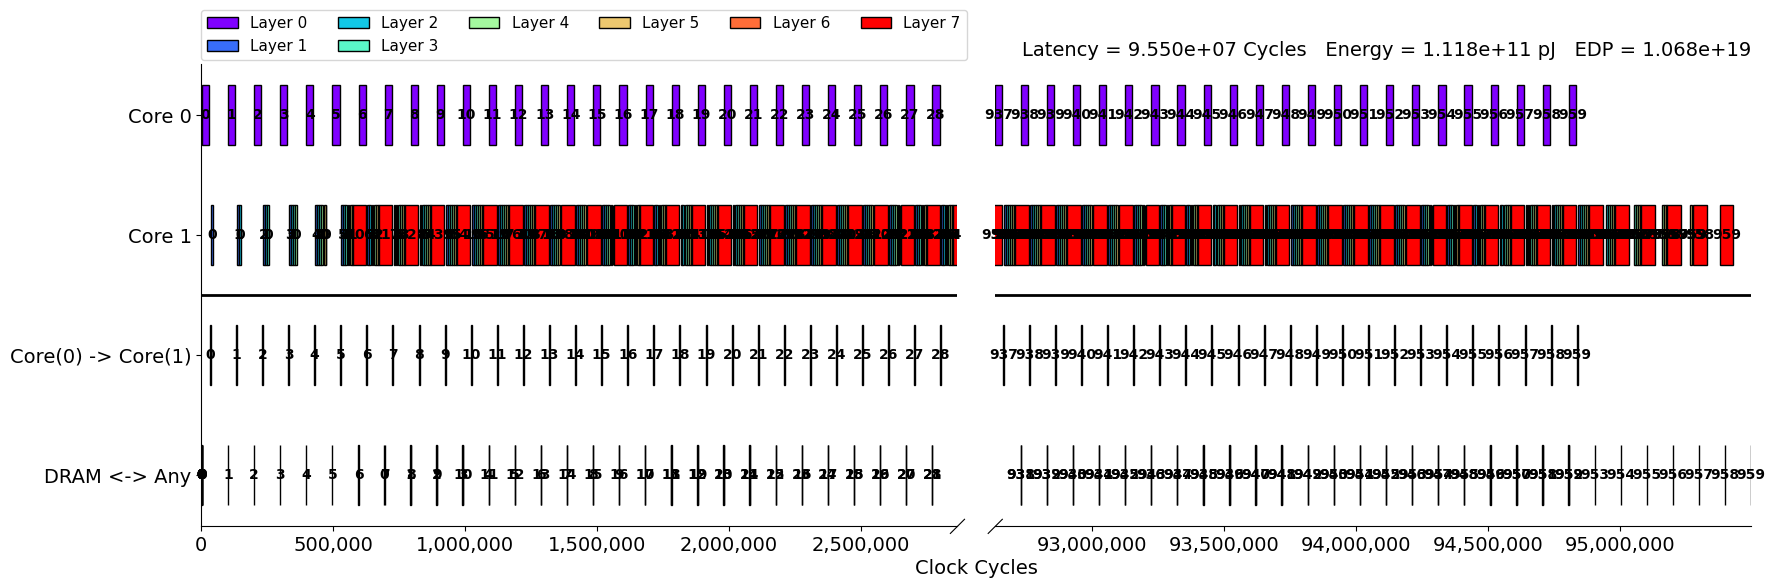

Saved memory usage fig to /tmp/memory


<Figure size 640x480 with 0 Axes>

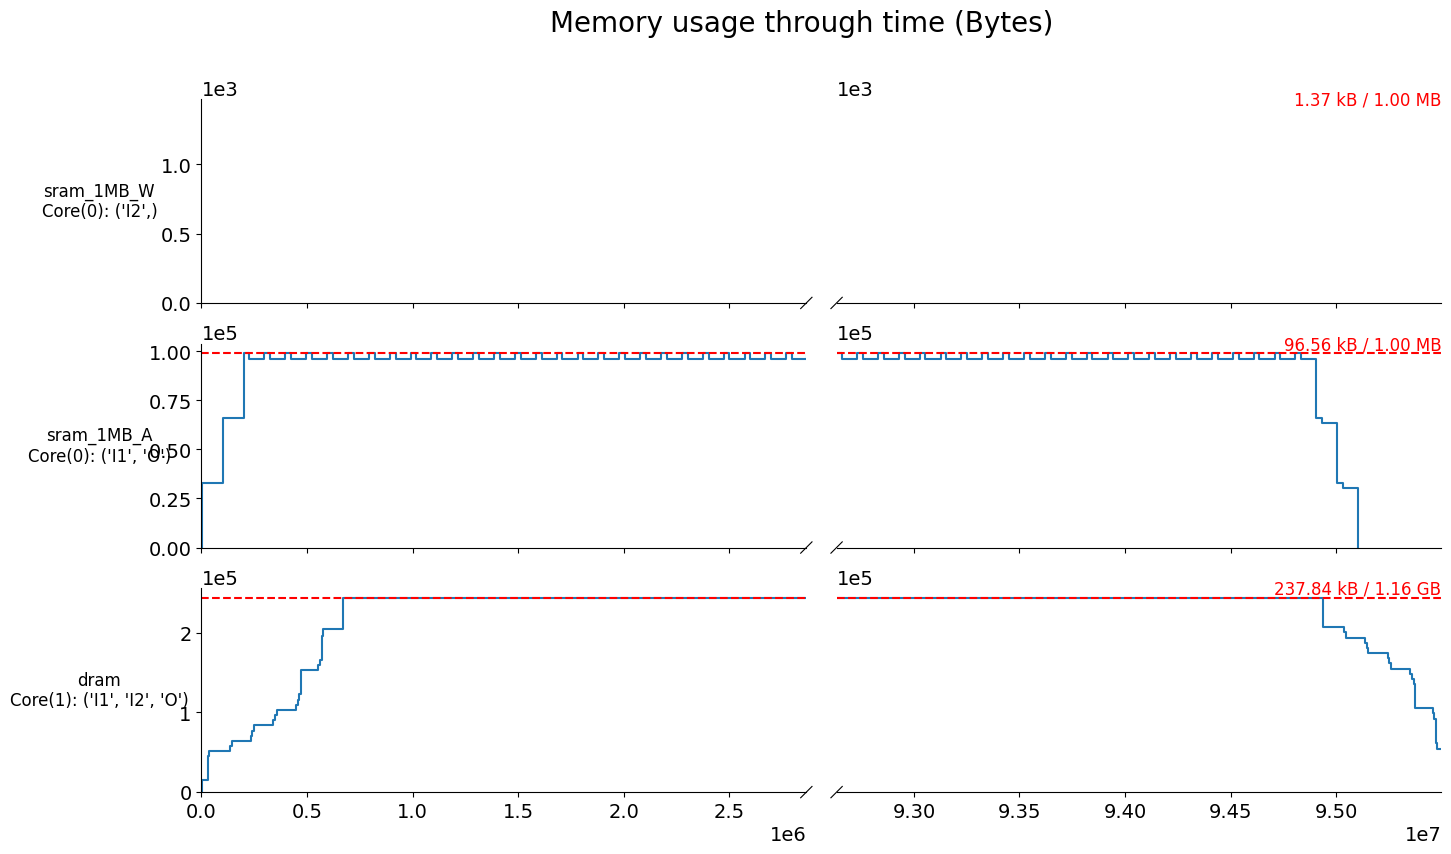

In [2]:
#import logging as _logging

#_logging_level = _logging.INFO
#_logging_format = (
#    "%(asctime)s - %(name)s.%(funcName)s +%(lineno)s - %(levelname)s - %(message)s"
#)
#_logging.basicConfig(level=_logging_level, format=_logging_format)

mainstage = MainStage(
    [  # Initializes the MainStage as entry point
        AcceleratorParserStage,  # Parses the accelerator
        StreamONNXModelParserStage,  # Parses the ONNX Model into the workload
        GenerateCNWorkloadHybridStage,
        IntraCoreMappingStage,
        InterCoreMappingStage,
    ],
    accelerator="architecture.eyeriss_tpu",  # required by AcceleratorParserStage
    workload_path="./workload/fsrcnn.onnx",  # required by ModelParserStage
    mapping_path="mapping.super_resolution_mapping",
    cn_define_mode=1,
    hint_loops=[("OX", "all")],
    loma_lpf_limit=2,
    nb_ga_generations = 0,
    nb_ga_individuals = 0,
    plot_hof=True,
    plot_file_name='plot.png',
    operands_to_prefetch = [],
    custom_fitness_evaluator=CyclicFitnessEvaluatorBuilder(
        sdf_relation="OX",
        optimization_type=MinimumLatency(),
    ),
)

[(scme, _), *_] = mainstage.run()

plot_timeline_brokenaxes(
    scme,
    False,
    section_start_percent=(0,97),
    percent_shown=(3,3),
    plot_data_transfer=True,
    fig_path="/tmp/timeline",
)

plot_memory_usage(scme, (0,97), (3,3), fig_path="/tmp/memory")

In [5]:
visualize_timeline_plotly(scme, True, True, "fsrcnn.html")

In [ ]:
from stream.visualization.schedule import visu

# MCCNN

gen	nevals	avg (energy estimate, cycle time)	std (energy estimate, cycle time)	min (energy estimate, cycle time)	max (energy estimate, cycle time)
0  	10    	['2.52e+11', '1.62e+05']         	['1.21e+11', '9.37e+04']         	['1.56e+11', '8.37e+04']         	['4.63e+11', '3.28e+05']         
1  	10    	['1.60e+11', '9.10e+04']         	['4.10e+09', '8.88e+03']         	['1.56e+11', '8.37e+04']         	['1.65e+11', '1.02e+05']         
2  	10    	['1.56e+11', '8.37e+04']         	['0.00e+00', '0.00e+00']         	['1.56e+11', '8.37e+04']         	['1.56e+11', '8.37e+04']         
3  	10    	['1.28e+11', '7.07e+04']         	['5.64e+10', '2.61e+04']         	['1.52e+10', '1.85e+04']         	['1.56e+11', '8.37e+04']         
4  	10    	['6.99e+10', '4.60e+04']         	['7.05e+10', '3.09e+04']         	['6.75e+09', '1.85e+04']         	['1.56e+11', '8.37e+04']         
5  	10    	['1.18e+10', '2.14e+04']         	['4.12e+09', '3.47e+03']         	['6.75e+09', '1.85e+04']         	['1.5

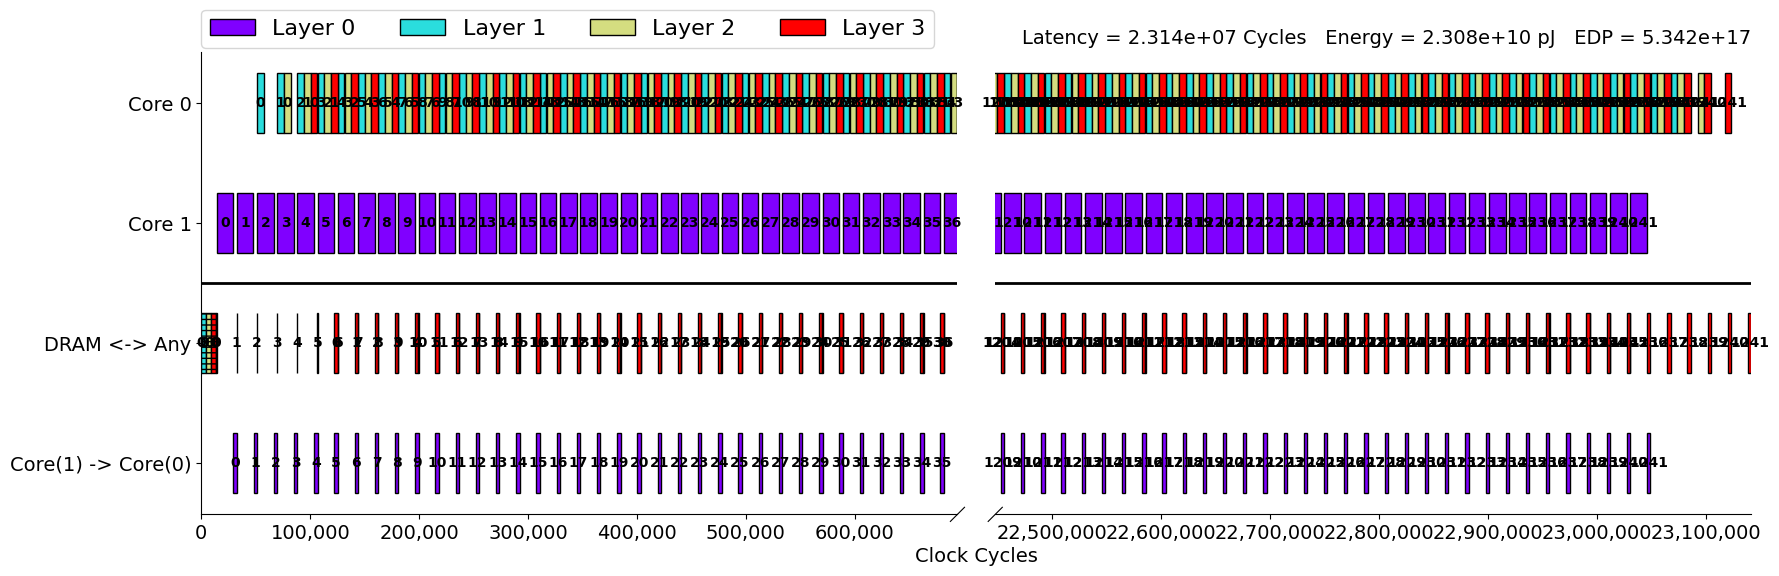

Saved memory usage fig to /tmp/memory


<Figure size 640x480 with 0 Axes>

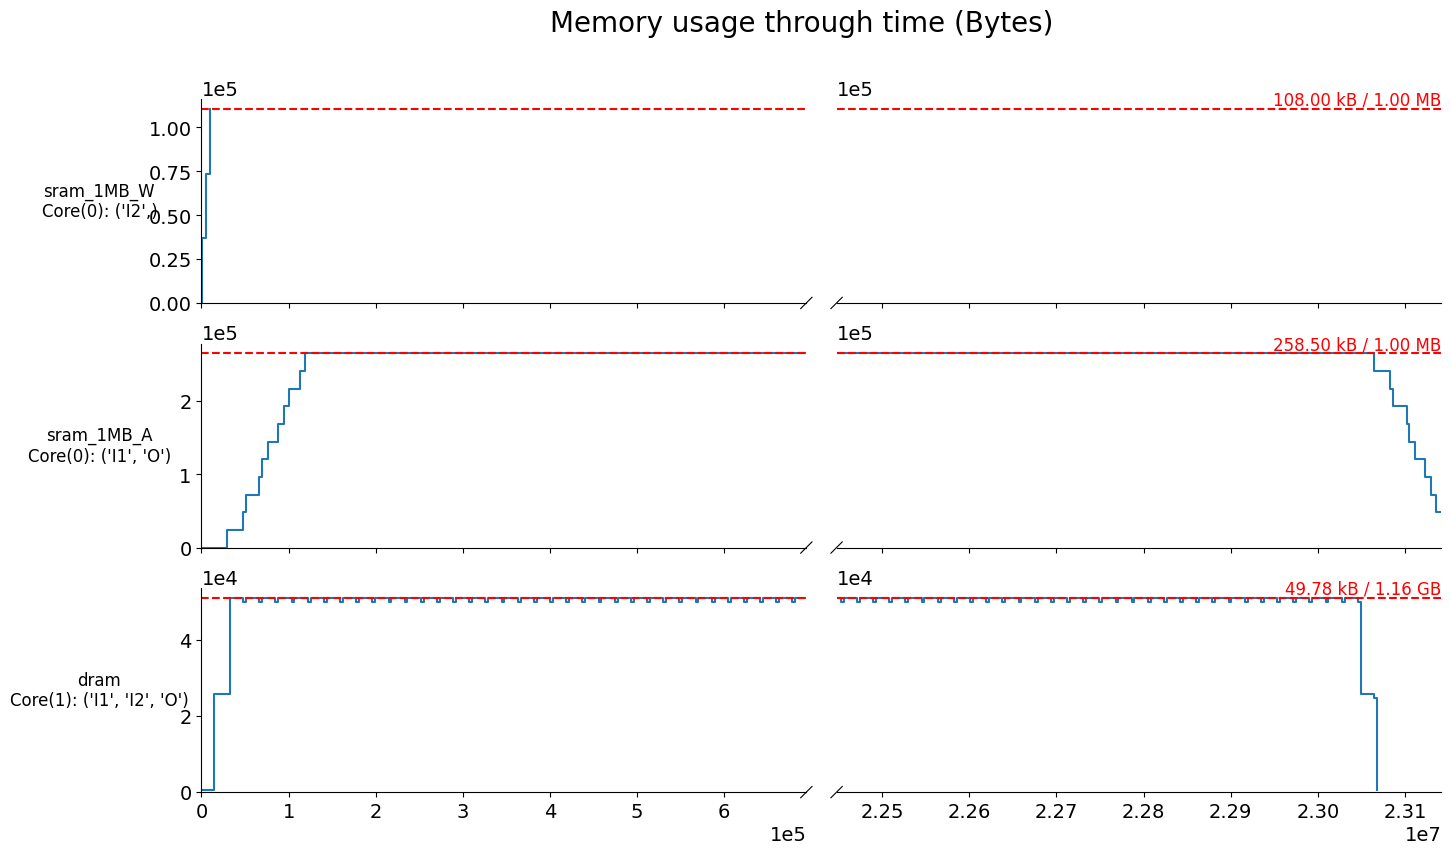

In [8]:
from datetime import datetime

mainstage = MainStage(
    [  # Initializes the MainStage as entry point
        AcceleratorParserStage,  # Parses the accelerator
        UserDefinedModelParserStage,  # Parses the ONNX Model into the workload
        GenerateCNWorkloadHybridStage,
        IntraCoreMappingStage,
        InterCoreMappingStage,
    ],
    accelerator="architecture.eyeriss_tpu",  # required by AcceleratorParserStage
    workload_path="workload.mccnn",  # required by ModelParserStage
    mapping_path="mapping.mccnn_mapping",
    cn_define_mode=1,
    hint_loops=[("OY", "all")],
    loma_lpf_limit=6,
    nb_ga_generations = 10,
    nb_ga_individuals = 10,
    plot_hof=True,
    plot_file_name='plot.png',
    operands_to_prefetch = [],
    custom_fitness_evaluator=CyclicFitnessEvaluatorBuilder(
        sdf_relation="OY",
        optimization_type=MinimumLatency(),
    ),
)

now = datetime.now()
[(scme, _), *_] = mainstage.run()
delta = datetime.now() - now
print(f"Analysis time: {delta.total_seconds()} seconds")

plot_timeline_brokenaxes(
    scme,
    False,
    section_start_percent=(0,97),
    percent_shown=(3,3),
    plot_data_transfer=True,
    fig_path="/tmp/timeline",
)

plot_memory_usage(scme, (0,97), (3,3), fig_path="/tmp/memory")

In [9]:
visualize_timeline_plotly(scme, True, True, "mccnn.html")

# Resnet 18 first 3 residuals

/home/andful/.pyenv/versions/3.12.1/lib/python3.12/site-packages/zigzag/classes/cost_model/cost_model.py:944: RuntimeWarning:

overflow encountered in scalar subtract

/home/andful/.pyenv/versions/3.12.1/lib/python3.12/site-packages/zigzag/classes/cost_model/cost_model.py:1154: RuntimeWarning:

overflow encountered in scalar add

/home/andful/.pyenv/versions/3.12.1/lib/python3.12/site-packages/zigzag/classes/cost_model/cost_model.py:1158: RuntimeWarning:

overflow encountered in scalar add

/home/andful/.pyenv/versions/3.12.1/lib/python3.12/site-packages/zigzag/classes/cost_model/cost_model.py:1163: RuntimeWarning:

overflow encountered in scalar add



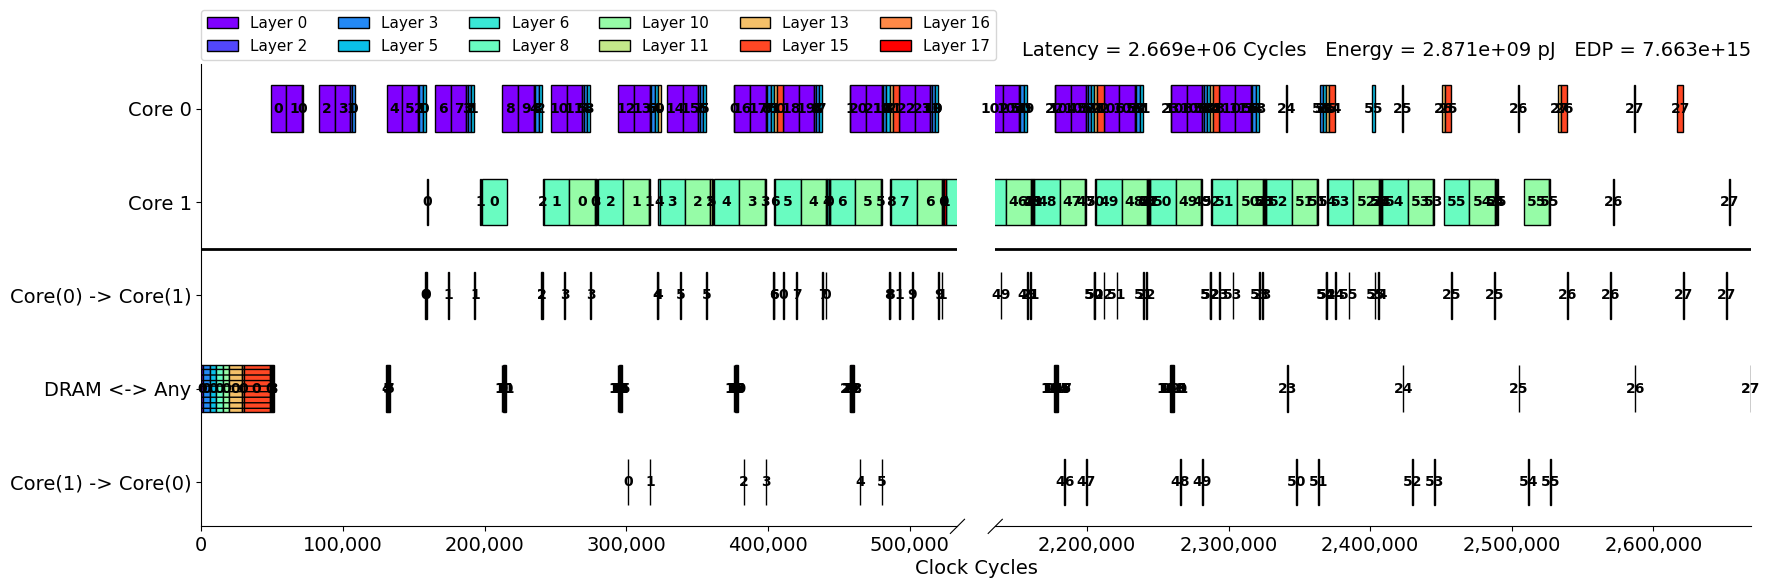

Saved memory usage fig to /tmp/memory


<Figure size 640x480 with 0 Axes>

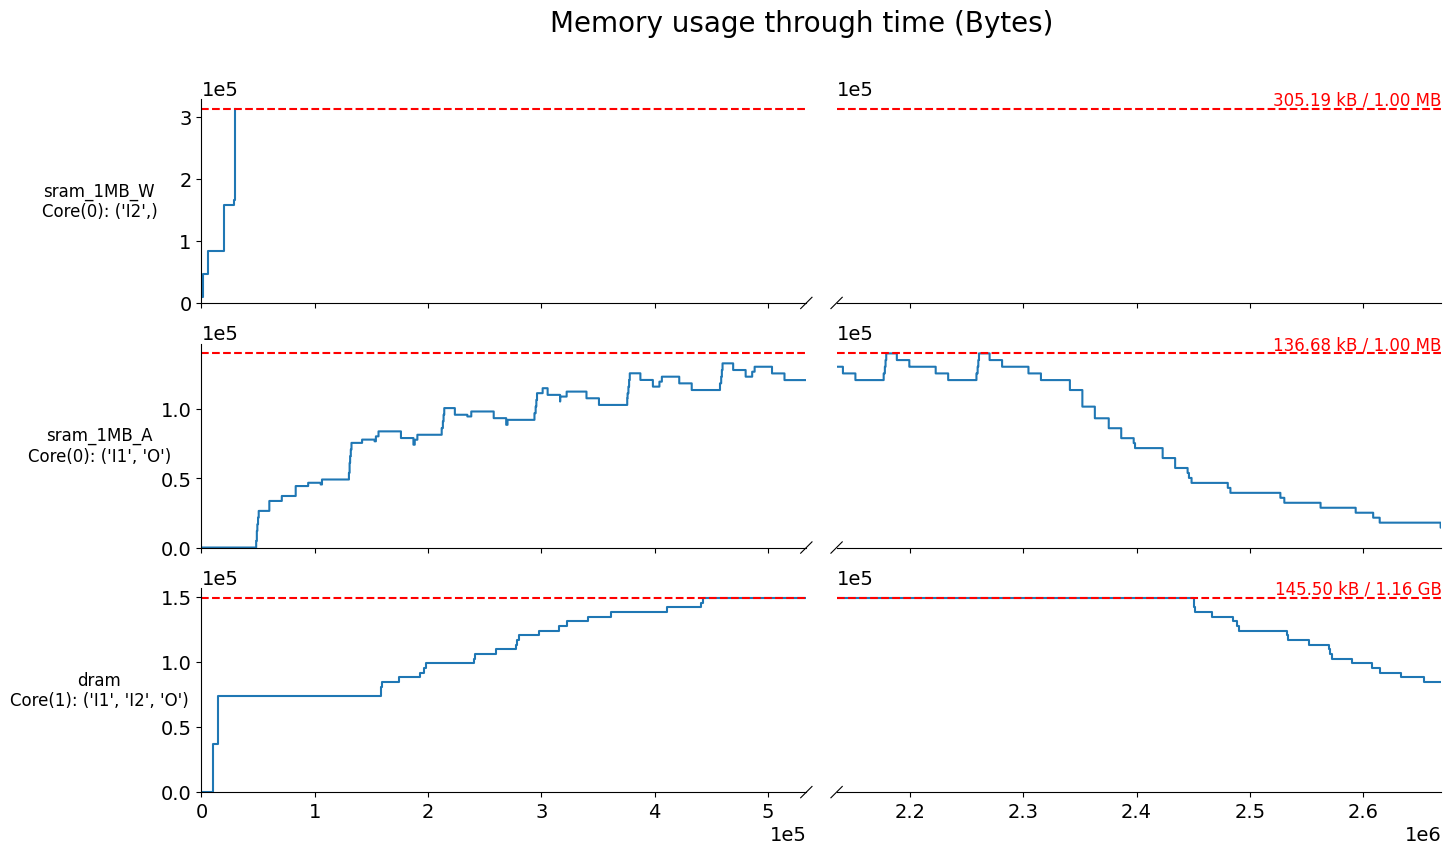

In [6]:
mainstage = MainStage(
    [  # Initializes the MainStage as entry point
        AcceleratorParserStage,  # Parses the accelerator
        StreamONNXModelParserStage,  # Parses the ONNX Model into the workload
        GenerateCNWorkloadHybridStage,
        IntraCoreMappingStage,
        InterCoreMappingStage,
    ],
    accelerator="architecture.eyeriss_tpu",  # required by AcceleratorParserStage
    workload_path="workload/resnet_3_residual.onnx",  # required by ModelParserStage
    mapping_path="mapping.resnet_3_residual_mapping",
    cn_define_mode=1,
    hint_loops=[("OX", "all")],
    loma_lpf_limit=2,
    nb_ga_generations = 0,
    nb_ga_individuals = 0,
    plot_hof=True,
    plot_file_name='plot.png',
    operands_to_prefetch = [],
    custom_fitness_evaluator=CyclicFitnessEvaluatorBuilder(
        sdf_relation="OX",
        optimization_type=MinimumLatency(),
    ),
)

[(scme, _), *_] = mainstage.run()

plot_timeline_brokenaxes(
    scme,
    False,
    section_start_percent=(0,80),
    percent_shown=(20, 20),
    plot_data_transfer=True,
    fig_path="/tmp/timeline",
)

plot_memory_usage(scme, (0, 80), (20, 20), fig_path="/tmp/memory")

In [7]:
visualize_timeline_plotly(scme, True, True, "resnet_3_residuals.html")